This document is made in Jupyter Notebook. Available on GitHub at: 

# Part 1 - Neuron with Constant Firing Rate

## Q1
For a homogenous Poisson distribution, the probability of an interspike interval falling between $\tau$ and $\tau + \Delta t$ given Poisson rate $r$ is:
$$ P[\tau \leq t_{i+1} - t_i < \tau + \Delta t] = r \Delta t e^{-r\tau}$$

The probaility density of interspike interval is therefore:
$$ p[\tau] = re^{-r\tau} $$

Thus, given a uniformly distributed random variable $x_{rand} \in [0, 1]$, the interspike intervals can be simulated by its inverse function:
$$ t_{i+1} - t_i = - \ln(x_{rand})/r$$

The given expression in Matlab is similar to the above equation, but it is missing the scaling factor of $\frac{1}{r}$. Thus using the Matlab code below, spikes train with correct Poisson rate (r = 10 Hz) is generated.
```matlab
-(1/10)*log(rand(N));
```
The same code is also demonstrated below using python:

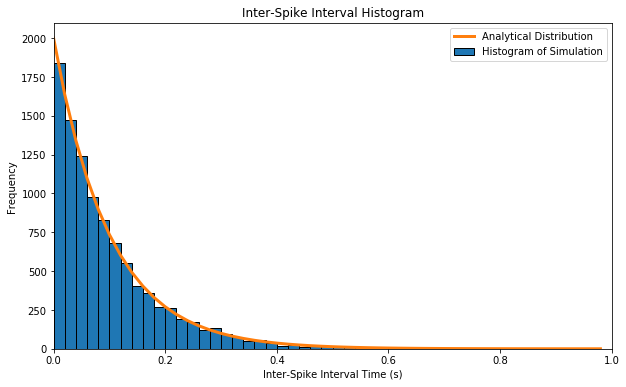

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import random as rand

N = 10000
r = 10

t = np.arange(0, 1, 0.02)
isi = [-(1/r) * np.log(rand()) for _ in range(N)]
scaling = N/len(t)
ed = scaling * r * np.exp(-r*(t))

plt.figure(figsize=(10,6))

plt.hist(isi, t, edgecolor='black')
plt.plot(t, ed, linewidth=3.0)

plt.title('Inter-Spike Interval Histogram')
plt.xlim(0, 1)
plt.xlabel("Inter-Spike Interval Time (s)")
plt.ylabel("Frequency")
plt.legend(['Analytical Distribution', 'Histogram of Simulation'])
plt.show()

## Q2
The interspike interval histogram should be modelled analytically by the probability distribution of interspike intervals. Specifically: 

$$ P[\tau \leq t_{i+1} - t_i < \tau + \Delta t] = r \Delta t e^{-r\tau}$$

This differ from the probability density function by $\Delta t$, which is given by the bin size ($\Delta t = 0.02$).

Additionally, the histogram models for $N$ simulations ($N = 10,000$), therefore the expected distribution should also be multiplied by N.

This leaves us with the scaling factor $ N\times \Delta t = 10,000 \times 0.02 = 200$


The expected distribution and interspike interval histogram appears nearly identical. Larger proportional errors occur at regions where expected number of spikes are relatively low (i.e. $t > 0.1$)

## Q4
The mean, variance and coefficient of variation of the above simulated interspike intervals are shown below in order.

In [5]:
sample_mean = np.mean(isi)
print("Sample mean:", sample_mean)

Sample mean: 0.09936018045726673


In [6]:
sample_var = np.var(isi)
print("Sample variance:", sample_var)

Sample variance: 0.009960331380120254


In [7]:
sample_cv = np.sqrt(sample_var)/np.mean(sample_mean)
print("Sample coefficient of variation:", sample_cv)

Sample coefficient of variation: 1.0044412092476849


## Q5
The mean, variance, and coefficient of variation of the analytical model (an exponential distribution) is given by the equations below:
$$\langle\tau\rangle =\frac{1}{r}$$

$${\sigma_\tau}^2 = \frac{1}{r^2}$$

$$C_v = \frac{\sigma_\tau}{\langle\tau\rangle} = \frac{r}{r} = 1$$

For r = 10 Hz, the comparison is shown in the table generated below.

In [8]:
expected_mean = 1/r
expected_var = 1/r**2
expected_cv = 1

def percent_error(sample, expected):
    return str(round(((sample - expected)/expected)*100,3))

from tabulate import tabulate
print(tabulate(
        [["Mean Interspike Interval", sample_mean, expected_mean, percent_error(sample_mean, expected_mean)],
         ["Variance", sample_var , expected_var, percent_error(sample_var, expected_var)],
         ["Coefficient of Variation", sample_cv, expected_cv, percent_error(sample_cv, expected_cv)],
        ],
        headers = ['Sample Model', 'Analytical Model', '% Error'],  tablefmt='fancy_grid'
    )
)

╒══════════════════════════╤════════════════╤════════════════════╤═══════════╕
│                          │   Sample Model │   Analytical Model │   % Error │
╞══════════════════════════╪════════════════╪════════════════════╪═══════════╡
│ Mean Interspike Interval │     0.0993602  │               0.1  │    -0.64  │
├──────────────────────────┼────────────────┼────────────────────┼───────────┤
│ Variance                 │     0.00996033 │               0.01 │    -0.397 │
├──────────────────────────┼────────────────┼────────────────────┼───────────┤
│ Coefficient of Variation │     1.00444    │               1    │     0.444 │
╘══════════════════════════╧════════════════╧════════════════════╧═══════════╛


The observed numerical difference is a result of the stochastic nature of the simulation. It can be minimised by increasing the sample size $N$. (see explanations below)

## Q3
The errors observed between the histogram and the analytical models are caused by the stochasticity of the simulation. By law of large numbers, (given that our analytical model is accurate), the margin of error between the analytical model and simulation should approach 0 as $N$ increases (i.e. $N \rightarrow \infty  $)

Visually, this means the blue bars are approaching the line plot and become space-filling only in areas below the line plot. This is illustrated by the three subplot simulations below:

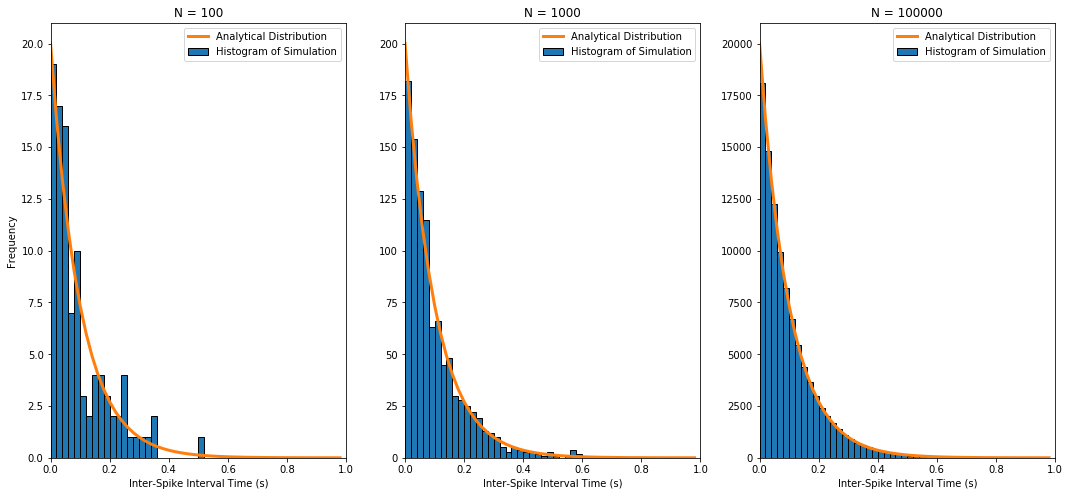

In [10]:
def simulate_ISIH(N, r = 10):
    t = np.arange(0, 1, 0.02)
    isi = [-(1/r) * np.log(rand()) for _ in range(N)]
    scaling = N/len(t)
    ed = scaling * r * np.exp(-r*(t))

    plt.hist(isi, t, edgecolor='black')
    plt.plot(t, ed, linewidth=3.0)

    plt.title('N = {}'.format(N))
    plt.xlim(0, 1)
    plt.xlabel("Inter-Spike Interval Time (s)")
    plt.legend(['Analytical Distribution', 'Histogram of Simulation'])
    
plt.subplots(figsize=(18,8))

plt.subplot(131)
simulate_ISIH(100)
plt.ylabel("Frequency")

plt.subplot(132)
simulate_ISIH(1000)

plt.subplot(133)
simulate_ISIH(100000)

Additionally, $N$ also directly influence the values on the y-axis. The number of spikes in each time bin should be directly proportional to $N$ - the total number of trials conducted. This effect can also be observed in the subplots.

# Part 2 - Orientation-Selective V1 Neuron

## Q6
The time interval is inversely proportional to the resolution of this simulation. For this form of simulation to be accurate, the resolution needs to be sufficient at capturing changes in the stimulus and thence the firing rate function. 

By observing the equation of the stimulus given in the matlab expression below, the stimulus perform stepwise changes that occurs at a frequency of 10 Hz (once every 0.1 second).
``` matlab
stimulus = -40+floor(t/0.1)*20;
```
Thus the time interval for the simulation should aim to be below 0.05 seconds (based on the Nyquist rate of 2 × 10 = 20 Hz) to capture the changes in stimulus and firing rate.

However, such resolution can still create high inaccuracies when it comes to interpreting firing rate values near points with high gradient (especially when t = {0.1, 0.2, 0.3, 0.4}). For instance, when determining the firing rate of a neuron at t = 0.09, one may choose to round down for r(t = 0.05) or round up for r(t = 0.1), each yielding very different firing rate. Although knowing the exact shape of the stimulus function makes it clear to see that rounding down will always produce the more accurate answer, having higher resolution can still improve the accuracy of firing rate calculation in between these stepwise intervals.

High resolution (low time interval) comes at a cost of computation time and memory so the resolution will always be limited when programming in this manner. A time interval of 0.0001 second is chosen by visual inspection of its resulting resolution.

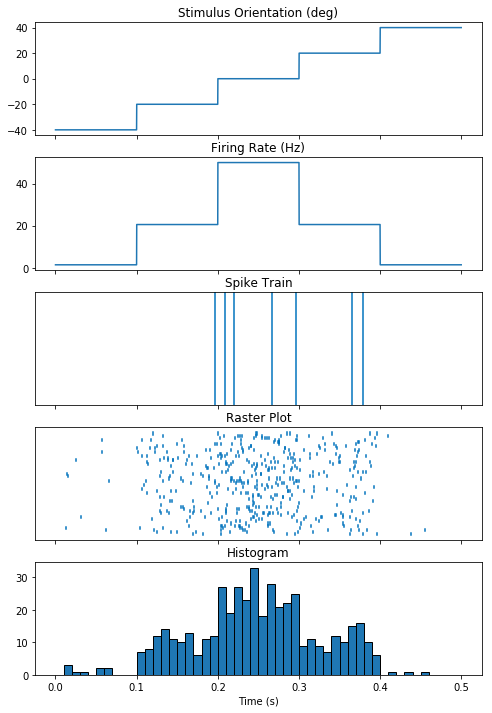

In [11]:
# Generate Stimulus
r_max = 50
s_max = 0
sigma_f = 15

dt = 0.0001

t = np.arange(0, 0.5, dt)
stimulus = -40 + np.floor(t/0.1)*20

# Generate Response (Firing Rate)
rate = r_max*np.exp(-np.square(stimulus/sigma_f)/2)

# Part (a)
f, axs = plt.subplots(5, sharex=True, figsize=(8,12))
# Plot Stimulus vs. Time
axs[0].plot(t, stimulus)
axs[0].set_title("Stimulus Orientation (deg)")
# Plot Firing Rate vs. Time
axs[1].plot(t, rate)
axs[1].set_title("Firing Rate (Hz)")

# Part (b) - Plot a Spike Train Using Random Number Generator
new_spike_time = -np.log(rand())/r_max
while new_spike_time < 0.5:
    i = int (new_spike_time / dt)
    if rate[i]/r_max > rand():
        axs[2].plot([new_spike_time, new_spike_time], [0, 1], Color='#0072BD')

    new_spike_time = (new_spike_time - np.log(rand())/50)
axs[2].set_yticks([])
axs[2].set_ylim([0,1])
axs[2].set_title("Spike Train")

# Part (c) - Generate and Plot 50 Spike Trains Using Random Number Generator
spikes50 = []
for n in range(50):
    new_spike_time = -np.log(rand())/r_max
    while new_spike_time < 0.5:
        i = int (new_spike_time / dt)
        if rate[i]/r_max > rand():
            spikes50.append(new_spike_time)
            axs[3].plot([new_spike_time, new_spike_time], [n, n+1], Color='#0072BD')

        new_spike_time = (new_spike_time - np.log(rand())/50)
axs[3].set_yticks([])
axs[3].set_title("Raster Plot")

# Part (d) - Histogram of Spike Trains Generated in Part (c)
bin_width = 0.01
bin_t = np.arange(0, 0.5+bin_width, bin_width)
axs[4].hist(spikes50, bin_t, edgecolor='black')
axs[4].set_xticks(np.arange(0,0.6,0.1))
axs[4].set_xlabel("Time (s)")
axs[4].set_title("Histogram")

plt.show()

## Q7
The generated singular spike train in the figure above (third row) does not fully resemble the firing rate function. Although more spikes appeared at the regions with high firing rate, spikes frequencies are disproportionately large for t > 0.3.

Singular set of spike train is insufficient in determining the function of a neuron. Since action potentials can result from uncertain complex interactions made by stochastic movements of huge number of charged particles, a neuron should be characterised probabilistically. Subsequently, a single set of spike train can only resemble a single event of this probablistically modelled neuron. And one cannot give a description of the probability distribution based on a single event. Thus one cannot describe the function of a neuron based on a single set of spike train.

## Q8
The density of the bars in this raster plot (row 4) show resemblance to the firing rate function of the neuron (row 2). The visual resemblance is especially clear when considering these bars with bin interval size of 0.1. 

Since this representation of spiketrains shows information relevant to the firing rate function of the neuron, this raster plot certainly provides a better representation of the neuron than the singular spike train outlined in Q7. However, the plot only provide visual indications instead of clear quantification of the neuron's behaviour.

## Q9
The PSTH plot (row 5) shares some visual resemblance with the firing rate function (row 2). The frequency of action potentials in the interval between 0.2 and 0.3 are all higher than the adjancent 0.1 second intervals. Frequency at 0.0 ~ 0.1 and 0.4 ~ 0.5 seconds are minimal just like the firing rate function. However, the general shape of the histogram is not as rectangular as the rate function. In fact it resembles more of a Gaussian distribution function due to the additional spikes occuring near t = 0.25

By the law of large numbers, given a sufficiently large amount of data generated by the same neuron under the same condition, the shape of the histogram is expected to be near identical to the firing rate distribution for the neuron.

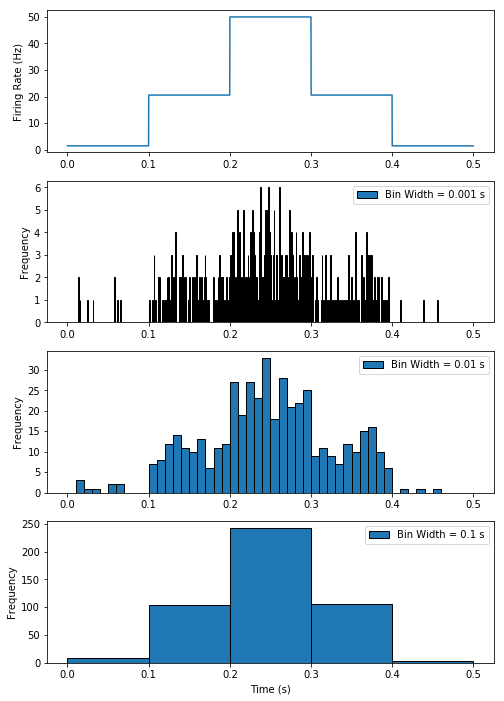

In [12]:
def PSTH(bin_width):
    bin_t = np.arange(0, 0.5+bin_width, bin_width)
    plt.hist(spikes50, bin_t, edgecolor='black')
    plt.xticks(np.arange(0,0.6,0.1))
    plt.legend(['Bin Width = {} s'.format(bin_width)])

plt.subplots(sharex='col', figsize=(8,12))

fig_1 = plt.subplot(411)
plt.plot(t, rate)
plt.ylabel("Firing Rate (Hz)")

plt.subplot(412, sharex=fig_1)
PSTH(0.001)
plt.ylabel("Frequency")

plt.subplot(413, sharex=fig_1)
PSTH(0.01)
plt.ylabel("Frequency")

plt.subplot(414, sharex=fig_1)
PSTH(0.1)
plt.xlabel("Time (s)")
plt.ylabel("Frequency")

plt.show()

## Q10
The histograms above shows how bin width resolution can promote or distort the resemblance between the PSTH and the firing rate function. When the resolution (bin width) of the histogram is set to match the rate of large interval change occuring in the firing rate, the PSTH appear near identical to the firing rate function (refer to row 4 and row 1). However, when the bin width is reduced, the higher resolution distorts the graphs resemblance and distribution of spikes appear less evenly distributed over certain intervals. This is observable in row 3 (bin width 1 ms) where a spectrum of different frequencies can be observed in regions of high firing rates. This histogram can easily be overfitted when infering trends about the firing rate of the neuron. Nevertheless, with larger quantity of data, the histograms with low bin width is expect to appear similar to the histograms with higher bin width ≤ 0.1 s. 

The size of the histogram is also proportional to the quantity of frequencies per bin. This can be seen by the changing y-axis scales.